In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the dataset
cancer_data = load_breast_cancer()
x = cancer_data.data
y = cancer_data.target

In [3]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [9]:
# implement PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Create a DataFrame for easy visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Target'] = y

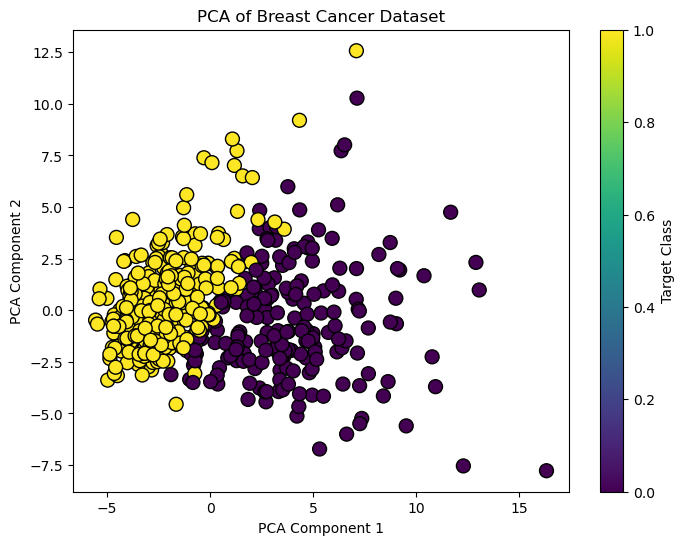

In [12]:
# Visualize the PCA RESULT
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Target'], cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Target Class')
plt.show()


In [14]:
# Implement Logistics Regression 

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
# Train the model
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions
log_pred = log.predict(X_test)

In [19]:
# Evaluate the model
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[42  1]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

